In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 6, 6
# rcParams['figure.dpi'] = 200

In [3]:
paper_results = {
    "appendicitis": 0.836,
    "iris": 0.835,
}

In [4]:
# AUBC_results_df = pd.read_csv("./Table3-AUBC-collect-Google-20211020-0.csv")
AUBC_results_df = pd.read_csv("./Table3-AUBC-collect-Google-20211020-iris.csv")
AUBC_results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   AUBC    100000 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB


In [5]:
K = 1000
mean_AUBC_per100_list = [
    AUBC_results_df.sample(n=100, replace=True, random_state=seed, ignore_index=True).mean()
    for seed in range(K)
]

In [6]:
mean_AUBC_per100 = pd.concat(mean_AUBC_per100_list).to_frame(name="Mean of AUBC").reset_index(drop=True)

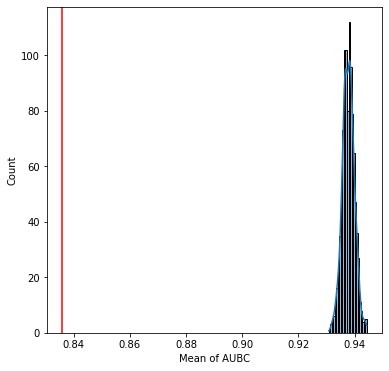

In [7]:
ax = sns.histplot(data=mean_AUBC_per100, x="Mean of AUBC", kde=True)
ax.axvline(x=paper_results["appendicitis"], color="r")

In [8]:
# SEM_AUBC_per100 = mean_AUBC_per100.std() / 10

In [9]:
# mean_mean_AUBC_per100 = mean_AUBC_per100.mean()
# upper_2stdPlusMean = mean_mean_AUBC_per100 + 2*SEM_AUBC_per100
# lower_2stdPlusMean = mean_mean_AUBC_per100 - 2*SEM_AUBC_per100
# upper_2stdPlusMean = upper_2stdPlusMean.values[0]
# lower_2stdPlusMean = lower_2stdPlusMean.values[0]

# upper_2stdPlusMean > paper_results["appendicitis"] > lower_2stdPlusMean

In [10]:
# print(upper_2stdPlusMean, paper_results["appendicitis"], lower_2stdPlusMean)